In [14]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
from keras.models import Model
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('C:/Users/docum/Downloads/train.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
train_dir = "C:/Users/docum/Downloads/train"
test_dir = "C:/Users/docum/Downloads/test1"

(429, 499, 3)

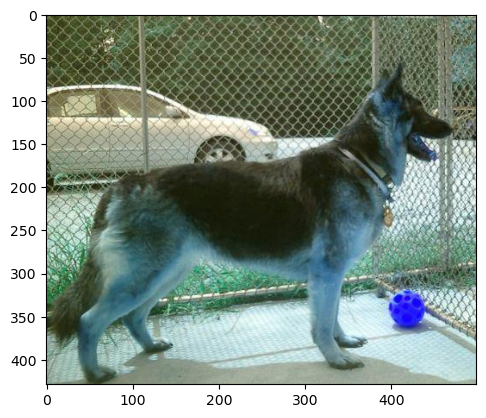

In [9]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("C:/Users/docum/Downloads/test1/1115.jpg")
plt.imshow(image)
image.shape

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [16]:
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    "C:/Users/docum/Downloads/train",
    target_size=(300, 300),
    batch_size=64,
    class_mode="binary"
)
validation_generator = validation_datagen.flow_from_directory(
    "C:/Users/docum/Downloads/test1",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 2691 images belonging to 1 classes.
Found 1295 images belonging to 1 classes.


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/5
8/8 [==============================] - 48s 6s/step - loss: 5.5513e-05 - accuracy: 1.0000 - val_loss: 8.4203e-06 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 43s 5s/step - loss: 9.6263e-06 - accuracy: 1.0000 - val_loss: 2.9226e-06 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 48s 6s/step - loss: 1.4916e-05 - accuracy: 1.0000 - val_loss: 9.3957e-06 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 47s 6s/step - loss: 1.0968e-05 - accuracy: 1.0000 - val_loss: 2.0006e-06 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 46s 6s/step - loss: 2.9570e-06 - accuracy: 1.0000 - val_loss: 7.2439e-06 - val_accuracy: 1.0000


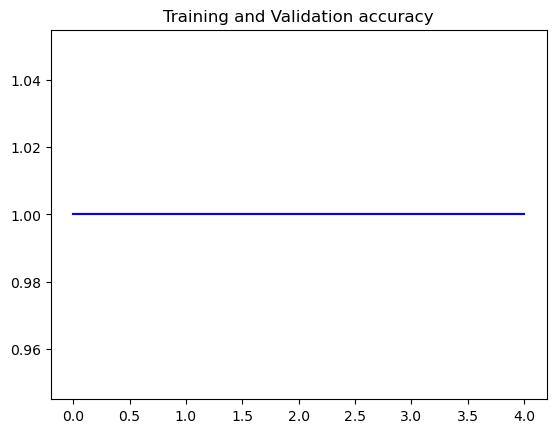

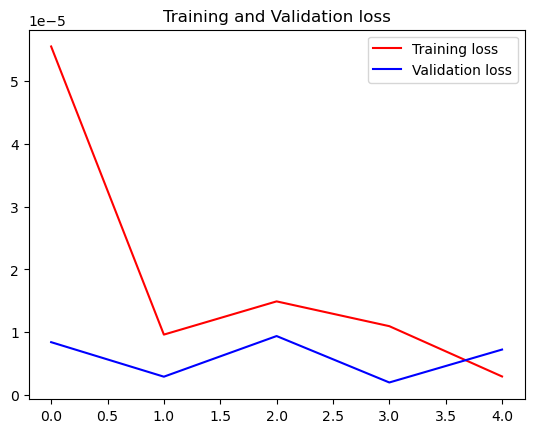

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()